# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

De toegevoerde energie is gelijk aan 160.073 kJ
De totale energie in verdamping en verwarming is gelijk aan 111.245 kJ


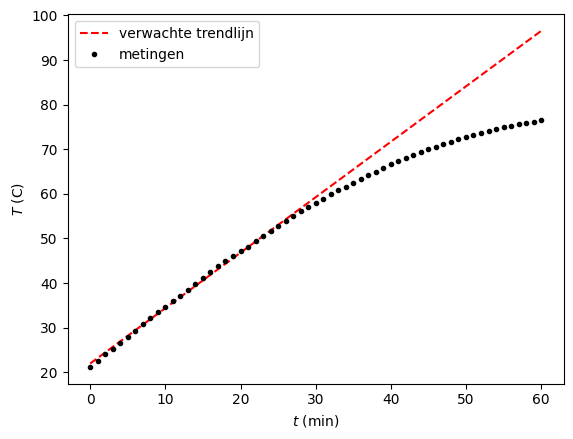

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fileName = 'tempmetingen.csv'

data = np.loadtxt(fileName, delimiter=';', skiprows=1)
data = data.T

t = data[0]
temp = data[1]

def y(x, a, b):
    return a*x+b

val, cov = curve_fit(y, t[:30], temp[:30])

t_test = np.linspace(0, 60, 1000)
temp_test = y(t_test, val[0], val[1])

m_begin = 1.2929-0.8208
m_eind = 1.2749-0.8208
c = 4186

Qverwarm = c*m_eind*(temp[-1]-temp[0])
Qverdamp = c*(m_begin-m_eind)*(100-temp[0])
Q = c * m_begin * (temp[10]-temp[0])

W = Q/600

Q_toe = W * (60*60)
Q_totaal = Qverwarm + Qverdamp

print('De toegevoerde energie is gelijk aan', np.round(Q_toe/1000, 3), 'kJ')
print('De totale energie in verdamping en verwarming is gelijk aan', np.round(Q_totaal/1000,3), 'kJ')
plt.figure()
plt.plot(t_test, temp_test, 'r--', label='verwachte trendlijn')
plt.plot(t, temp, 'k.', label='metingen')
plt.xlabel('$t$ (min)')
plt.ylabel('$T$ (C)')
plt.legend()
plt.show()


# Vraag 1
De metingen wijken af van de verwachte trendlijn in het geval dat alle toegevoerde energie in het water gaat zitten, dit komt doordat het water verdampt bij een hoge temperatuur, en er warmte verloren gaat, waardoor de temperatuur van het water minder snel zal stijgen.

# Vraag 2
De totale toegevoerde energie is 160 kJ, en de energie die in het verdampen en verwarmen van het water zit is 111 kJ. Dit verschil zal waarschijnlijk veroorzaakt zijn doordat er in een uur tijd veel warmte verloren gaat aan de lucht, en ook een beetje in de maatbeker komt te zitten. Hierbij wordt aangenomen dat de maatbeker niet afgesloten is van de omgeving en het systeem dus niet goed geïsoleerd is.
# Vraag 3
Door beter isolerend materiaal te gebruiken voor de beker waar het water in zit en de opstelling zo dicht mogelijk te maken met een zo klein mogelijke opening voor de thermometer, deze kan nog kleiner worden gemaakt door bijvoorbeeld een thermische draad te gebruiken. Op deze manier gaat er minder warmte verloren aan de omgeving, en zal de waarde van de totale toegevoerde energie veel dichter bij de waarde van de energie die in het verdampen en verwarmen van het water zit liggen.